## Importando Bibliotecas

In [2]:
#Importação das Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Carregando Base de Dados

In [3]:
#Importando as bases de dados
#Dataframe de treinamento
treino = pd.read_csv('train.csv')

#Dataframe de teste
teste = pd.read_csv('test.csv')

## Data Exploration

In [4]:
#Vendo as 15 primeiras linhas do Df treino
teste.tail(15)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
6478,2012-12-31 09:00:00,1,0,1,2,7.38,10.605,64,7.0015
6479,2012-12-31 10:00:00,1,0,1,2,8.20,10.605,69,8.9981
6480,2012-12-31 11:00:00,1,0,1,2,9.02,11.365,60,12.9980
6481,2012-12-31 12:00:00,1,0,1,2,9.84,11.365,56,12.9980
6482,2012-12-31 13:00:00,1,0,1,2,10.66,12.880,44,11.0014
6483,2012-12-31 14:00:00,1,0,1,2,11.48,13.635,45,15.0013
6484,2012-12-31 15:00:00,1,0,1,2,11.48,14.395,45,8.9981
6485,2012-12-31 16:00:00,1,0,1,2,10.66,12.880,48,12.9980
6486,2012-12-31 17:00:00,1,0,1,2,10.66,14.395,48,6.0032
6487,2012-12-31 18:00:00,1,0,1,2,10.66,13.635,48,8.9981


In [5]:
#Vendo se algum dado é nulo
treino.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Weather 

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

In [6]:
#Vendo cada tipo de clima
treino.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

,count
weather,
1,205.236791
2,178.955540
3,118.846333
4,164.000000


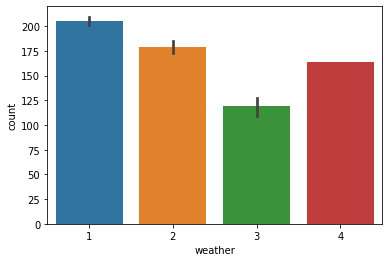

In [7]:
#Vendo a média de alugueis em cada tipo de clima
sns.barplot(x='weather', y='count', data=treino)
treino[['count', 'weather']].groupby(['weather'], as_index = True).mean()


season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

,count
season,
1,116.343261
2,215.251372
3,234.417124
4,198.988296


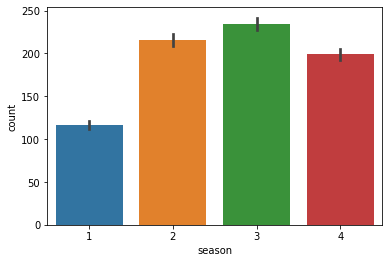

In [8]:
#Vendo a média de alugueis em cada tipo de estação
sns.barplot(x='season', y='count', data=treino)
treino[['count', 'season']].groupby(['season'], as_index = True).mean()

In [9]:
#Vendo a média de alugueis em feriados e não feriados
treino[['count', 'holiday']].groupby(['holiday'], as_index = True).mean()

,count
holiday,
0,191.741655
1,185.877814


<AxesSubplot:>

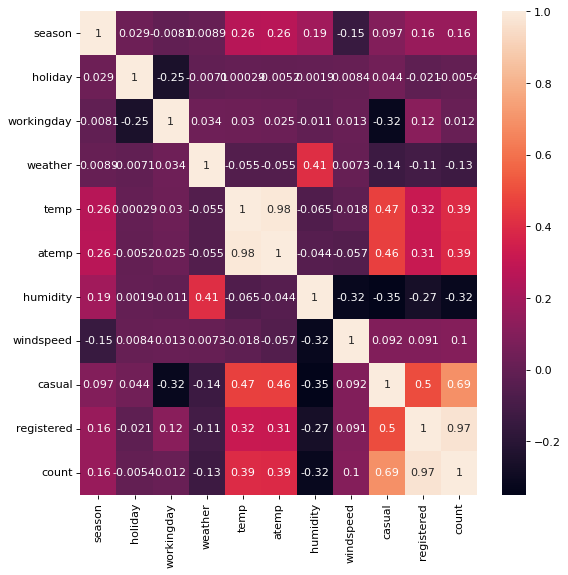

In [10]:
correlacao = treino.corr()
plt.figure(figsize=(8, 8), dpi=80)
sns.heatmap(data=correlacao, annot=True)

## Manipulação de Dados

In [11]:
#manipulando a coluna datatime 

#tirando a hora de datetime e criando uma nova coluna 
treino["hora"] = [t.hour for t in pd.DatetimeIndex(treino.datetime)]
#tirando o dia de datetime e criando uma nova coluna 
treino["dia"] = [t.dayofweek for t in pd.DatetimeIndex(treino.datetime)]
#tirando o mês de datetime e criando uma nova coluna 
treino["mês"] = [t.month for t in pd.DatetimeIndex(treino.datetime)]
#tirando o ano de datetime e criando uma nova coluna 
treino['ano'] = [t.year for t in pd.DatetimeIndex(treino.datetime)]
#transformando os anos em 0 para 2011 e 1 para 2012
treino['ano'] = treino['ano'].map({2011:0, 2012:1})

In [12]:
#retirando o que influencia menos no como visto anteriormente
treino.drop(['datetime','holiday','atemp'], axis=1,inplace=True)

In [13]:
#Adicionando colunas com indicadores

treino = pd.get_dummies(treino, columns = [ 'workingday','season', 'weather'], prefix = [ 'workingday', 'season', 'weather'])

In [14]:
#Vendo as 15 primeiras linhas do Df treino
treino.head(15)

,temp,humidity,windspeed,casual,registered,count,hora,dia,mês,ano,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,81,0.0000,3,13,16,0,5,1,0,1,0,1,0,0,0,1,0,0,0
1,9.02,80,0.0000,8,32,40,1,5,1,0,1,0,1,0,0,0,1,0,0,0
2,9.02,80,0.0000,5,27,32,2,5,1,0,1,0,1,0,0,0,1,0,0,0
3,9.84,75,0.0000,3,10,13,3,5,1,0,1,0,1,0,0,0,1,0,0,0
4,9.84,75,0.0000,0,1,1,4,5,1,0,1,0,1,0,0,0,1,0,0,0
5,9.84,75,6.0032,0,1,1,5,5,1,0,1,0,1,0,0,0,0,1,0,0
6,9.02,80,0.0000,2,0,2,6,5,1,0,1,0,1,0,0,0,1,0,0,0
7,8.20,86,0.0000,1,2,3,7,5,1,0,1,0,1,0,0,0,1,0,0,0
8,9.84,75,0.0000,1,7,8,8,5,1,0,1,0,1,0,0,0,1,0,0,0
9,13.12,76,0.0000,8,6,14,9,5,1,0,1,0,1,0,0,0,1,0,0,0


<AxesSubplot:>

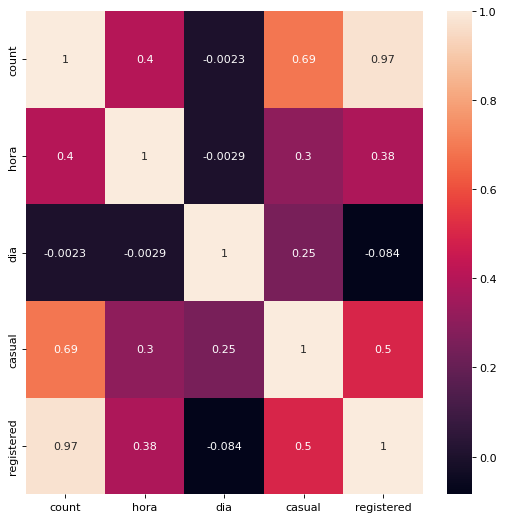

In [15]:
#vendo a correlação entre os alugueis com hora e dia
correlacao = treino[['count', 'hora','dia', 'casual', 'registered']].corr()
plt.figure(figsize=(8, 8), dpi=80)
sns.heatmap(correlacao, annot=True)


## Modelos

In [16]:
#importando modelos de ML
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [17]:
#Retirando os alugueis e a velocudade do vento
x = treino.drop(columns = ['registered', 'casual', 'count', 'windspeed'])
x.shape

(10886, 16)

In [18]:
#selecionando apenas o número de alugueis
y = treino['count']
y.shape

(10886,)

In [19]:
#criando o modelo
rf = RandomForestRegressor(n_estimators=200, criterion='mse', n_jobs=-1,random_state=0)
rf.fit(x, y)
#fazendo o predict de count a partir dos inputs
y_treino_prev = rf.predict(x)

np.round(y_treino_prev)

array([ 22.,  33.,  26., ..., 178., 135.,  94.])

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
#como RMSE é o critério usado pelo kaggle usamos ele para buscar o menor valor e fazer os testes antes de upar no site
print('RMSLE treino: %.3f' % np.sqrt(mean_squared_error(np.log(y + 1), np.log(y_treino_prev + 1))))
#Usamos também o r² para ver a acurácia
print('R² treino: %.3f' % r2_score(y, y_treino_prev))

RMSLE treino: 0.141
R² treino: 0.994


[0.458 0.831 0.939 0.915 0.873 0.618 0.815 0.917 0.922 0.884]
Média é: 0.82


(array([1., 0., 0., 1., 0., 0., 0., 2., 2., 4.]),
 array([0.45784386, 0.50595858, 0.55407329, 0.60218801, 0.65030273,
        0.69841745, 0.74653217, 0.79464688, 0.8427616 , 0.89087632,
        0.93899104]),
 <BarContainer object of 10 artists>)

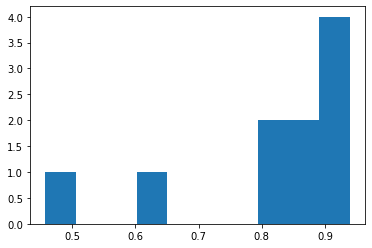

In [21]:
#Vendo a média de R² do modelo 
scores = cross_val_score(rf,x, y, cv = 10)
print(np.round(scores, decimals=3))
print('Média é: %.2f' % scores.mean())
plt.hist(scores)


## Submetendo para o kaggle

### Fazendo o mesmo do treido só que agora com o DF teste

In [22]:
teste["hora"] = [t.hour for t in pd.DatetimeIndex(teste.datetime)]
teste["dia"] = [t.dayofweek for t in pd.DatetimeIndex(teste.datetime)]
teste["mês"] = [t.month for t in pd.DatetimeIndex(teste.datetime)]
teste['ano'] = [t.year for t in pd.DatetimeIndex(teste.datetime)]
teste['ano'] = teste['ano'].map({2011:0, 2012:1})

In [23]:
teste = pd.get_dummies(teste, columns = ['workingday','season', 'weather'], prefix = ['workingday','season', 'weather'])

In [24]:
x_teste = teste.drop(columns = ['windspeed','holiday','atemp','datetime'])

In [25]:
y_teste_prev = rf.predict(x_teste)
y_teste_prev=np.round(y_teste_prev)

### Criando o csv para submeter as previsões feitas

In [26]:
# Usando o exemplo como base
base = pd.read_csv('sampleSubmission.csv')
base['count'] = y_teste_prev

# Criando o novo arquivo de csv 
base.to_csv('bike_submission.csv',index=False)